In [1]:
import pandas as pd
import matplotlib as plt
import os
import itertools
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

from PIL import Image
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from nltk.util import ngrams
import re
from collections import Counter

import nltk
from nltk.corpus import stopwords

import requests
import json

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:

IPL_data = pd.concat([
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_1.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_2.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_3.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_4.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_5.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_6.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_7.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_8.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_9.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_10.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_11.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_12.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_13.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_14.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_15.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_16.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_17.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_18.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_19.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_20.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_21.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_22.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_23.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_24.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_25.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_26.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_27.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_28.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_29.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_30.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_31.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_32.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_33.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_34.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_35.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_36.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_37.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_38.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_39.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_40.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_41.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_42.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_43.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_44.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_45.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_46.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_47.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_48.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_49.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_50.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_51.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_52.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_53.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_54.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_55.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_56.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_57.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_58.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_59.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_60.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_61.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_62.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_63.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_64.csv'),
    pd.read_csv('../input/ipl-2022-tweets/tweets_IPL_65.csv'),
    
],ignore_index=True)

IPL_data


,Unnamed: 0,Date,User,Tweet,Hashtags
0,0,2022-03-25 23:58:02+00:00,SpecialActress,மும்பையில் இன்று ஐபிஎல் டி20 தொடரின் 15வது சீச...,"['IPLT20', 'IPL2022', 'cMiaTamil']"
1,1,2022-03-25 23:57:36+00:00,Singa_Perumaal,#IPL Day …. https://t.co/1IddwNZtjp,['IPL']
2,2,2022-03-25 23:57:04+00:00,Munu_Rewana,#IPL2022 gonna start today This time I support...,"['IPL2022', 'RoyalChallengersBangalore', 'RCB'..."
3,3,2022-03-25 23:54:45+00:00,DeshanJayasing2,#IPL2022,['IPL2022']
4,4,2022-03-25 23:51:58+00:00,ItzSachhin,@CricCrazyJohns #IPL2022 prediction time:\n\nW...,['IPL2022']
...,...,...,...,...,...
633982,6577,2022-05-28 00:03:10+00:00,DhoniPankaj7,Meanwhile IPL Trophy To #RCB :\n\n#RCBvsRR #Ch...,"['RCB', 'RCBvsRR', 'Chokli', 'Haarcb', 'RRvsRC..."
633983,6578,2022-05-28 00:02:58+00:00,DhoniPankaj7,Meanwhile IPL Trophy To #RCB :\n\n#RCBvsRR #Ch...,"['RCB', 'RCBvsRR', 'Chokli', 'Haarcb', 'RRvsRC..."
633984,6579,2022-05-28 00:02:54+00:00,abpmajhatv,"IPL 2022 : आरसीबीचं आव्हान संपलं, राजस्थानची फ...","['IPL', 'IPL2022', 'RCBvsRR']"
633985,6580,2022-05-28 00:02:06+00:00,Sportsworld0412,"""I wouldn't say Virat Kohli has had a miserabl...","['IPL', 'TATAIPL']"


In [3]:
IPL_data.drop(IPL_data.columns[[0]], axis=1, inplace=True)
IPL_data['Date'] = IPL_data['Date'].astype('string')
IPL_data['Tweet'] = IPL_data['Tweet'].astype('string')
IPL_data

,Date,User,Tweet,Hashtags
0,2022-03-25 23:58:02+00:00,SpecialActress,மும்பையில் இன்று ஐபிஎல் டி20 தொடரின் 15வது சீச...,"['IPLT20', 'IPL2022', 'cMiaTamil']"
1,2022-03-25 23:57:36+00:00,Singa_Perumaal,#IPL Day …. https://t.co/1IddwNZtjp,['IPL']
2,2022-03-25 23:57:04+00:00,Munu_Rewana,#IPL2022 gonna start today This time I support...,"['IPL2022', 'RoyalChallengersBangalore', 'RCB'..."
3,2022-03-25 23:54:45+00:00,DeshanJayasing2,#IPL2022,['IPL2022']
4,2022-03-25 23:51:58+00:00,ItzSachhin,@CricCrazyJohns #IPL2022 prediction time: Win...,['IPL2022']
...,...,...,...,...
633982,2022-05-28 00:03:10+00:00,DhoniPankaj7,Meanwhile IPL Trophy To #RCB : #RCBvsRR #Chok...,"['RCB', 'RCBvsRR', 'Chokli', 'Haarcb', 'RRvsRC..."
633983,2022-05-28 00:02:58+00:00,DhoniPankaj7,Meanwhile IPL Trophy To #RCB : #RCBvsRR #Chok...,"['RCB', 'RCBvsRR', 'Chokli', 'Haarcb', 'RRvsRC..."
633984,2022-05-28 00:02:54+00:00,abpmajhatv,"IPL 2022 : आरसीबीचं आव्हान संपलं, राजस्थानची फ...","['IPL', 'IPL2022', 'RCBvsRR']"
633985,2022-05-28 00:02:06+00:00,Sportsworld0412,"""I wouldn't say Virat Kohli has had a miserabl...","['IPL', 'TATAIPL']"


In [4]:
def remove_special_chars(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

IPL_data['Tweet'].fillna('', inplace=True)

IPL_data['Tweet'] = IPL_data['Tweet'].astype(str)

IPL_data['Tweet'] = IPL_data['Tweet'].apply(remove_special_chars)

IPL_data

,Date,User,Tweet,Hashtags
0,2022-03-25 23:58:02+00:00,SpecialActress,20 15 \n\n \n httpstcoxVGPLXZymP\n\n...,"['IPLT20', 'IPL2022', 'cMiaTamil']"
1,2022-03-25 23:57:36+00:00,Singa_Perumaal,IPL Day httpstco1IddwNZtjp,['IPL']
2,2022-03-25 23:57:04+00:00,Munu_Rewana,IPL2022 gonna start today This time I support ...,"['IPL2022', 'RoyalChallengersBangalore', 'RCB'..."
3,2022-03-25 23:54:45+00:00,DeshanJayasing2,IPL2022,['IPL2022']
4,2022-03-25 23:51:58+00:00,ItzSachhin,CricCrazyJohns IPL2022 prediction time\n\nWinn...,['IPL2022']
...,...,...,...,...
633982,2022-05-28 00:03:10+00:00,DhoniPankaj7,Meanwhile IPL Trophy To RCB \n\nRCBvsRR Chokli...,"['RCB', 'RCBvsRR', 'Chokli', 'Haarcb', 'RRvsRC..."
633983,2022-05-28 00:02:58+00:00,DhoniPankaj7,Meanwhile IPL Trophy To RCB \n\nRCBvsRR Chokli...,"['RCB', 'RCBvsRR', 'Chokli', 'Haarcb', 'RRvsRC..."
633984,2022-05-28 00:02:54+00:00,abpmajhatv,IPL 2022 \nIPL IPL2022 RCBvsRR \nhttpstc...,"['IPL', 'IPL2022', 'RCBvsRR']"
633985,2022-05-28 00:02:06+00:00,Sportsworld0412,I wouldnt say Virat Kohli has had a miserable ...,"['IPL', 'TATAIPL']"


In [5]:
IPL_data['Date']=IPL_data['Date'].str[:10]
IPL_data

,Date,User,Tweet,Hashtags
0,2022-03-25,SpecialActress,20 15 \n\n \n httpstcoxVGPLXZymP\n\n...,"['IPLT20', 'IPL2022', 'cMiaTamil']"
1,2022-03-25,Singa_Perumaal,IPL Day httpstco1IddwNZtjp,['IPL']
2,2022-03-25,Munu_Rewana,IPL2022 gonna start today This time I support ...,"['IPL2022', 'RoyalChallengersBangalore', 'RCB'..."
3,2022-03-25,DeshanJayasing2,IPL2022,['IPL2022']
4,2022-03-25,ItzSachhin,CricCrazyJohns IPL2022 prediction time\n\nWinn...,['IPL2022']
...,...,...,...,...
633982,2022-05-28,DhoniPankaj7,Meanwhile IPL Trophy To RCB \n\nRCBvsRR Chokli...,"['RCB', 'RCBvsRR', 'Chokli', 'Haarcb', 'RRvsRC..."
633983,2022-05-28,DhoniPankaj7,Meanwhile IPL Trophy To RCB \n\nRCBvsRR Chokli...,"['RCB', 'RCBvsRR', 'Chokli', 'Haarcb', 'RRvsRC..."
633984,2022-05-28,abpmajhatv,IPL 2022 \nIPL IPL2022 RCBvsRR \nhttpstc...,"['IPL', 'IPL2022', 'RCBvsRR']"
633985,2022-05-28,Sportsworld0412,I wouldnt say Virat Kohli has had a miserable ...,"['IPL', 'TATAIPL']"


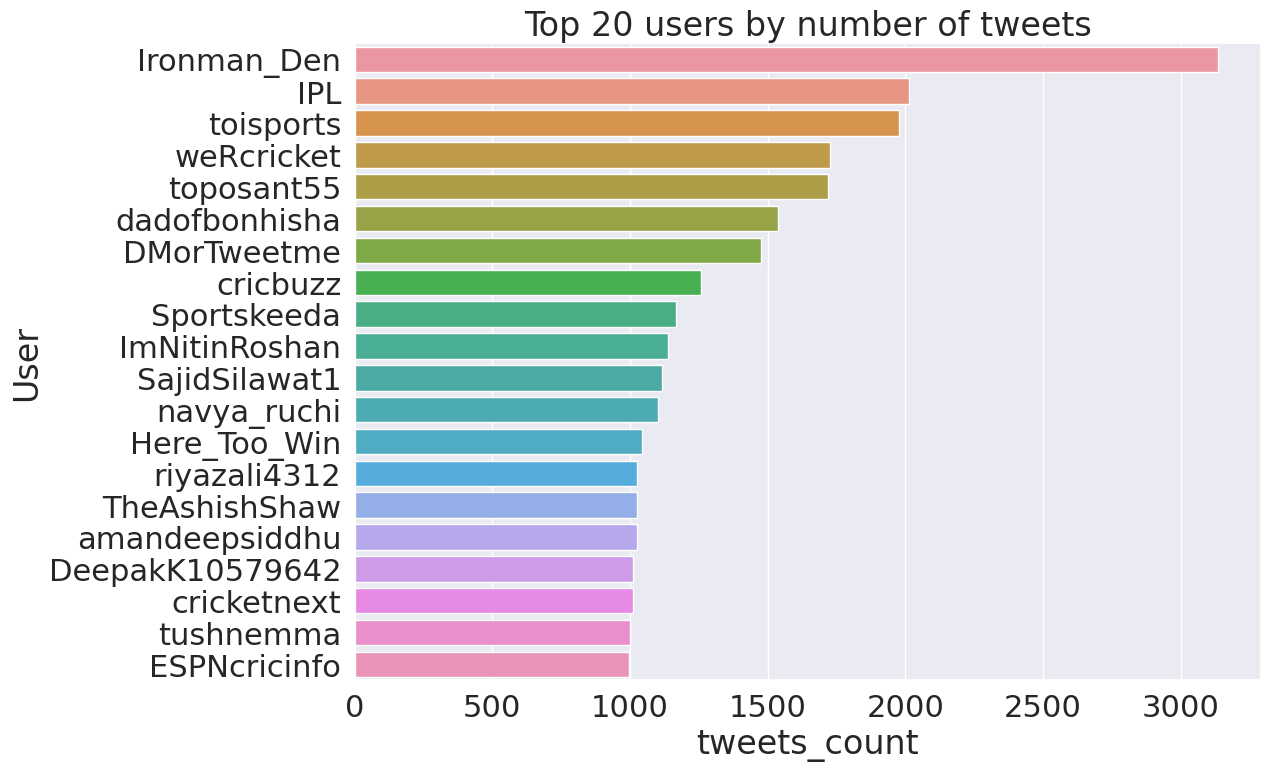

In [6]:
ds = IPL_data['User'].value_counts().reset_index()
ds.columns = ['User', 'tweets_count']
ds = ds.sort_values(['tweets_count'],ascending=False)
IPL_data = pd.merge(IPL_data, ds, on='User')
sns.set(font_scale=2) 
fig = sns.barplot( 
    x=ds.head(20)["tweets_count"], 
    y=ds.head(20)["User"], 
    orientation='horizontal'
).set_title('Top 20 users by number of tweets')

In [7]:
IPL_data['Date'] = pd.to_datetime(IPL_data['Date'])
IPL_data['Day_num'] = IPL_data['Date'].rank(method='dense').astype(int)
IPL_data

,Date,User,Tweet,Hashtags,tweets_count,Day_num
0,2022-03-25,SpecialActress,20 15 \n\n \n httpstcoxVGPLXZymP\n\n...,"['IPLT20', 'IPL2022', 'cMiaTamil']",4,1
1,2022-03-25,SpecialActress,httpstcoxVGPLXHp8H\n\nIPL2022 CSKvKKR c...,"['IPL2022', 'CSKvKKR', 'cMiaTamil']",4,1
2,2022-03-25,SpecialActress,httpstcoxVGPLXZymP\n\nIPL2022 cMiaTamil h...,"['IPL2022', 'cMiaTamil']",4,1
3,2022-03-26,SpecialActress,httpstcoxVGPLXZymP\n\nIPL2022 cMiaTamil ...,"['IPL2022', 'cMiaTamil']",4,2
4,2022-03-25,Singa_Perumaal,IPL Day httpstco1IddwNZtjp,['IPL'],6,1
...,...,...,...,...,...,...
633982,2022-05-28,Ronak_Dev18,Well played RCBTweets through out the season ...,"['RCBvRR', 'IPL']",1,65
633983,2022-05-28,vinothkc,Worst IPL ever Zero Entertainment amp must hav...,"['IPL', 'IPL2022']",1,65
633984,2022-05-28,sahu_sibo,wady3690 josbuttler He literally lit ipl just ...,"['ipl', 'TimDavid']",1,65
633985,2022-05-28,singh_amikesh,People who dont even know how to properly hold...,"['ViratKohli', 'IPL']",1,65


In [8]:
tab = pd.DataFrame(columns=['Team Name', 'Positive', 'Negative', 'Neutral'])
from textblob import TextBlob
def table_data(keyword, df, tab):
    pos=0
    neg=0
    neu=0
    df_filtered = df[ ( df['Tweet'].str.contains(keyword, case=False) | df['Hashtags'].str.contains('#' + keyword, case=False))]
    for t in df_filtered['Tweet']:
        analysis = TextBlob(t)
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            pos+=1
        elif polarity == 0:
            neu+=1
        else:
            neg+=1
    df2={'Team Name': keyword, 'Positive': pos, 'Negative': neg, 'Neutral': neu}
    tab = tab.append(df2, ignore_index = True)
    return tab

In [9]:
tab=table_data('GT', IPL_data, tab)
tab=table_data('RR', IPL_data, tab)
tab=table_data('LSG', IPL_data, tab)
tab=table_data('RCB', IPL_data, tab)
tab=table_data('DC', IPL_data, tab)
tab=table_data('PBKS', IPL_data, tab)
tab=table_data('KKR', IPL_data, tab)
tab=table_data('SRH', IPL_data, tab)
tab=table_data('CSK', IPL_data, tab)
tab=table_data('MI', IPL_data, tab)
tab

,Team Name,Positive,Negative,Neutral
0,GT,18162,4357,83754
1,RR,26080,7775,100723
2,LSG,19249,4566,90293
3,RCB,26587,6747,105719
4,DC,15011,4261,77789
5,PBKS,14469,3962,83721
6,KKR,18193,5265,83404
7,SRH,14743,3570,78966
8,CSK,21401,5874,85521
9,MI,36668,10707,93848


In [10]:
from textblob import TextBlob
def result_calculator(days, keyword, df):
    pos=0
    neg=0
    neu=0
    for d in days:
        df_filtered = df[ ( (df['Day_num'] == d) & (df['Tweet'].str.contains(keyword, case=False) 
                                    | df['Hashtags'].str.contains('#' + keyword, case=False)))]
        for t in df_filtered['Tweet']:
            analysis = TextBlob(t)
            polarity = analysis.sentiment.polarity
            if polarity > 0:
                pos+=1
            elif polarity == 0:
                neu+=1
            else:
                neg+=1
    return [(pos/(pos+neg+neu)),(neg/(pos+neg+neu))]

In [11]:
res = pd.DataFrame(columns=['Match_No', 'Team1', 'Team2', 'Home_Pos', 'Home_Neg', 'Away_Pos', 'Away_Neg'])
res.head()

,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg


In [12]:
def predict_match(m,t1,t2,days,res,df):
    met1=result_calculator(days,t1,df)
    met2=result_calculator(days,t2,df)
    df2={'Match_No': m, 'Team1': t1, 'Team2': t2, 
         'Home_Pos': met1[0], 'Home_Neg': met1[1], 'Away_Pos': met2[0], 'Away_Neg': met2[1]}
    res = res.append(df2, ignore_index = True)
    return res

In [13]:
res = predict_match(1,'CSK','KKR',[1], res, IPL_data)
res = predict_match(2,'DC','MI',[2], res, IPL_data)
res = predict_match(3,'PBKS','RCB',[2], res, IPL_data)
res = predict_match(4,'GT','LSG',[3], res, IPL_data)
res = predict_match(5,'SRH','RR',[4], res, IPL_data)
res = predict_match(6,'RCB','KKR',[5], res, IPL_data)
res = predict_match(7,'LSG','CSK',[6], res, IPL_data)
res = predict_match(8,'KKR','PBKS',[7], res, IPL_data)
res = predict_match(9,'MI','RR',[8], res, IPL_data)
res = predict_match(10,'GT','DC',[8], res, IPL_data)
res = predict_match(11,'CSK','PBKS',[9], res, IPL_data)
res = predict_match(12,'SRH','LSG',[10], res, IPL_data)
res = predict_match(13,'RR','RCB',[11], res, IPL_data)
res = predict_match(14,'KKR','MI',[12], res, IPL_data)
res = predict_match(15,'LSG','DC',[13], res, IPL_data)
res = predict_match(18,'PBKS','GT',[14], res, IPL_data)
res = predict_match(17,'CSK','SRH',[15], res, IPL_data)
res = predict_match(18,'RCB','MI',[15], res, IPL_data)
res = predict_match(19,'KKR','DC',[16], res, IPL_data)
res = predict_match(20,'RR','LSG',[16], res, IPL_data)
res = predict_match(21,'SRH','GT',[17], res, IPL_data)
res = predict_match(22,'CSK','RCB',[18], res, IPL_data)
res = predict_match(23,'MI','PBKS',[19], res, IPL_data)
res = predict_match(24,'RR','GT',[20], res, IPL_data)
res = predict_match(25,'SRH','KKR',[21], res, IPL_data)
res = predict_match(26,'MI','LSG',[22], res, IPL_data)
res = predict_match(27,'DC','RCB',[22], res, IPL_data)
res = predict_match(28,'PBKS','SRH',[23], res, IPL_data)
res = predict_match(29,'GT','CSK',[23], res, IPL_data)
res = predict_match(30,'RR','KKR',[24], res, IPL_data)
res = predict_match(31,'LSG','RCB',[25], res, IPL_data)
res = predict_match(32,'DC','PBKS',[26], res, IPL_data)
res = predict_match(33,'MI','CSK',[27], res, IPL_data)
res = predict_match(34,'DC','RR',[28], res, IPL_data)
res = predict_match(35,'KKR','GT',[29], res, IPL_data)
res = predict_match(36,'RCB','SRH',[29], res, IPL_data)
res = predict_match(37,'LSG','MI',[30], res, IPL_data)
res = predict_match(38,'PBKS','CSK',[31], res, IPL_data)
res = predict_match(39,'RCB','RR',[32], res, IPL_data)
res = predict_match(40,'GT','SRH',[33], res, IPL_data)
res = predict_match(41,'DC','KKR',[34], res, IPL_data)
res = predict_match(42,'PBKS','LSG',[35], res, IPL_data)
res = predict_match(43,'GT','RCB',[36], res, IPL_data)
res = predict_match(44,'RR','MI',[36], res, IPL_data)
res = predict_match(45,'DC','LSG',[37], res, IPL_data)
res = predict_match(46,'SRH','CSK',[37], res, IPL_data)
res = predict_match(47,'KKR','RR',[38], res, IPL_data)
res = predict_match(48,'GT','PBKS',[39], res, IPL_data)
res = predict_match(49,'RCB','CSK',[40], res, IPL_data)
res = predict_match(50,'DC','SRH',[41], res, IPL_data)
res = predict_match(51,'GT','MI',[42], res, IPL_data)
res = predict_match(52,'PBKS','RR',[43], res, IPL_data)
res = predict_match(53,'LSG','KKR',[43], res, IPL_data)
res = predict_match(54,'SRH','RCB',[44], res, IPL_data)
res = predict_match(55,'CSK','DC',[44], res, IPL_data)
res = predict_match(56,'MI','KKR',[45], res, IPL_data)
res = predict_match(57,'LSG','GT',[46], res, IPL_data)
res = predict_match(58,'RR','DC',[47], res, IPL_data)
res = predict_match(59,'CSK','MI',[48], res, IPL_data)
res = predict_match(60,'RCB','PBKS',[49], res, IPL_data)
res = predict_match(61,'KKR','SRH',[50], res, IPL_data)
res = predict_match(62,'CSK','GT',[51], res, IPL_data)
res = predict_match(63,'LSG','RR',[51], res, IPL_data)
res = predict_match(64,'PBKS','DC',[52], res, IPL_data)
res = predict_match(65,'MI','SRH',[53], res, IPL_data)
res = predict_match(66,'KKR','LSG',[54], res, IPL_data)
res = predict_match(67,'RCB','GT',[55], res, IPL_data)
res = predict_match(68,'RR','CSK',[56], res, IPL_data)
res = predict_match(69,'MI','DC',[57], res, IPL_data)
res = predict_match(70,'SRH','PBKS',[58], res, IPL_data)
res = predict_match(71,'GT','RR',[59,60], res, IPL_data)
res = predict_match(72,'LSG','RCB',[61], res, IPL_data)
res = predict_match(73,'RR','RCB',[62,63], res, IPL_data)
res = predict_match(74,'GT','RR',[64,65], res, IPL_data)

In [14]:
res

,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg
0,1,CSK,KKR,0.319088,0.054843,0.332582,0.045096
1,2,DC,MI,0.426230,0.057377,0.425141,0.074859
2,3,PBKS,RCB,0.440000,0.060000,0.402778,0.097222
3,4,GT,LSG,0.386364,0.102273,0.421053,0.052632
4,5,SRH,RR,0.381818,0.072727,0.461847,0.188755
...,...,...,...,...,...,...,...
69,70,SRH,PBKS,0.441860,0.162791,0.400000,0.100000
70,71,GT,RR,0.374302,0.054004,0.331590,0.065900
71,72,LSG,RCB,0.396825,0.063492,0.387387,0.049550
72,73,RR,RCB,0.369128,0.089485,0.231063,0.051932


In [15]:
res.to_csv('IPL_Sentiment.csv')

In [16]:
import numpy as np
results=np.array([1,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,1,0,1,0,0,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,0])
res['result']=results.tolist()
res.head()

,Match_No,Team1,Team2,Home_Pos,Home_Neg,Away_Pos,Away_Neg,result
0,1,CSK,KKR,0.319088,0.054843,0.332582,0.045096,1
1,2,DC,MI,0.426230,0.057377,0.425141,0.074859,0
2,3,PBKS,RCB,0.440000,0.060000,0.402778,0.097222,0
3,4,GT,LSG,0.386364,0.102273,0.421053,0.052632,0
4,5,SRH,RR,0.381818,0.072727,0.461847,0.188755,1


In [17]:
res.to_csv('IPL_Sentiment.csv')